# Introduction to Neural Networks

## Neurons as logic gates

Here we will experiment with neuron computations.  We will show how to represent basic logic functions like AND, OR, and XOR using single neurons (or more complicated structures).  Finally, at the end we will walk through how to represent neural networks as a string of matrix computations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sigmoid function:

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. A standard computer chip circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input. This is similar to the behavior of the linear perceptron in neural networks. However, only nonlinear activation functions allow such networks to compute nontrivial problems using only a small number of nodes. This can be accomplished by using the sigmoid function.

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [2]:
def sigmoid(x):
    """
    Sigmoid function
    Activation function for a single neuron.
    """
    return 1.0 / (1.0 + np.exp(-x))

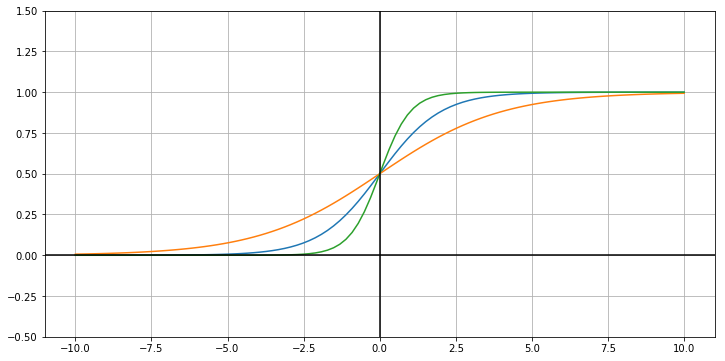

In [3]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
activation2 = sigmoid(0.5*vals)
activation3 = sigmoid(2.0*vals)
fig = plt.figure(figsize=(12,6))
plt.plot(vals, activation)
plt.plot(vals, activation2)
plt.plot(vals, activation3)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Note that changing the 'weight' on the input values for the sigmoid function changes the 'steepness' of the curve. That's useful, but what if you wanted the network to output 0 when `x` is 2? Just changing the steepness of the sigmoid won't really work -- you want to be able to shift the entire curve to the right. The plot below shows what happens when we add a bias term.

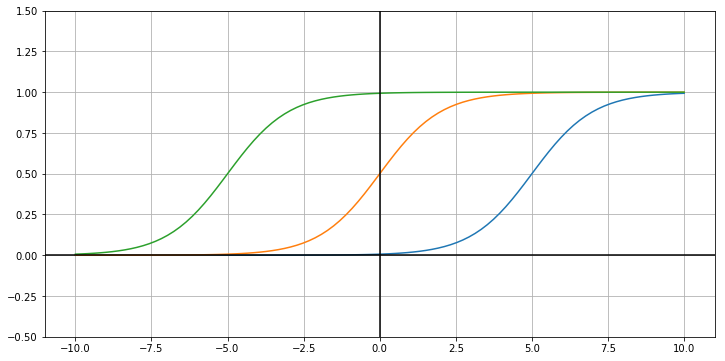

In [4]:
# Plot the sigmoid function with or without bias
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals + -5*1.0)
activation2 = sigmoid(vals + 0*1.0)
activation3 = sigmoid(vals + 5*1.0)
fig = plt.figure(figsize=(12,6))
plt.plot(vals, activation)
plt.plot(vals, activation2)
plt.plot(vals, activation3)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

### Thinking of neurons as boolean logic gates

A logic gate takes in two boolean (true/false or 1/0) inputs, and returns either a 0 or 1 depending on its rule. The truth table for a logic gate shows the outputs for each combination of inputs, (0, 0), (0, 1), (1,0), and (1, 1). For example, let's look at the truth table for an "OR" gate:

### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values. Imagine a neuron that takes in two inputs, $x_1$ and $x_2$, and a bias term:

![](images_2/logic01.png)

By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights (represented by ? marks above), such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Remember: $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be? 
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

![](images_2/logic02.png)

In [5]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

### Example of an `OR` gate.

In [6]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


### Example of an `AND` gate.

In [7]:
and_gate = logic_gate(15,15,-20)
test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


### Example of a `NOR` gate.

In [8]:
nor_gate = logic_gate(-20,-20,10)
test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


### Example of a `NAND` gate.

In [9]:
nand_gate = logic_gate(-15,-15,20)
test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## The limits of single neurons

The XOR gates are the basis of computation. They can be used as so-called "half-adders", the foundation of being able to add numbers together. Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?

What if we tried something more complex:

![](images_2/logic03.png)

Here, we've got the inputs going to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates then get passed to another neuron, which is an AND gate. If you work out the outputs at each combination of input values, you'll see that this is an XOR gate!

In [10]:
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks as Matrix Computations

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

![](images/FF_NN.png)



Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test the functions on `x_in` and `x_mat_in`.

In [11]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_1

array([[ 2, -1,  1,  4],
       [-1,  2, -3,  1],
       [ 3, -2, -1,  5]])

In [12]:
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])

In [13]:
x_in = np.array([.5,.8,.2])
x_in

array([ 0.5,  0.8,  0.2])

In [14]:
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])
x_mat_in

array([[ 0.5,  0.8,  0.2],
       [ 0.1,  0.9,  0.6],
       [ 0.2,  0.2,  0.3],
       [ 0.6,  0.1,  0.9],
       [ 0.5,  0.5,  0.4],
       [ 0.9,  0.1,  0.9],
       [ 0.1,  0.8,  0.7]])

In [15]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

Calculating the output for a single input.

In [16]:
def nn_calc_single(x_in, W, bias=0.0):
    """
    Inputs: a vector, x_in, representing a single input, W, a list containing weight matrices
    representing the weights in each layer, and b, a bias term.
    Output: the result of the neural network for a single input.
    """
    weights = []
    
    z2 = np.dot(x_in, W[0]) + bias
    a2 = sigmoid(z2)
    weights.append(a2)
    
    for i in range(1, len(W)):
        z = np.dot(weights[-1], W[i]) + bias
        a = sigmoid(z)
        weights.append(a)
    
    output = soft_max_vec(weights[-1])
    
    return output

W = [W_1, W_2, W_3]
print(nn_calc_single(x_in, W, bias=0))

[ 0.43661088  0.37773511  0.18565401]


Calculating the output for a matrix of inputs.

In [17]:
def nn_calc_mat(x_mat_in, W, bias=0.0):
    
    output = x_mat_in
    
    for i in range(len(W)):
        z = np.dot(output, W[i])
        output = sigmoid(z)
    
    return soft_max_mat(output)

print(nn_calc_mat(x_mat_in, W))

[[ 0.43661088  0.37773511  0.18565401]
 [ 0.42273475  0.39552897  0.18173627]
 [ 0.43126309  0.38249038  0.18624653]
 [ 0.39712538  0.42230468  0.18056993]
 [ 0.41729399  0.40143126  0.18127475]
 [ 0.39712079  0.41993225  0.18294695]
 [ 0.41307274  0.40776163  0.17916563]]
